# Data Pre Processing

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.19.0-cp312-cp312-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.71.0-cp312-cp312-macosx_10_14_universal2.whl.metadata (3.8 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 1.5 MB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from datetime import date

In [2]:
os.getcwd()

'/Users/vishalgajavelly/Desktop/CS 578/CS 578 Project/m5-forecasting-uncertainty'

In [63]:
# Loading Data sets
product_sales_df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/sales_train_evaluation.csv")
prices_df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/sell_prices.csv")
calendar_df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/calendar.csv")

In [4]:
#Sub-sampling Condition :  California stores with items under HOBBIES category
product_sales_df = product_sales_df.loc[(product_sales_df['state_id'] == 'CA') & (product_sales_df['cat_id'] == 'HOBBIES')]
prices_df = prices_df.loc[(prices_df['store_id'].isin(['CA_1', 'CA_2', 'CA_3', 'CA_4'])) & (prices_df['item_id'].str.contains("HOBBIES", na = False))]

print("product_sales_df count: " + str(len(product_sales_df)) + "\nprices_df count: " + str(len(prices_df)) + "\ncalendar_df count: " + str(len(calendar_df)))

product_sales_df count: 2260
prices_df count: 509594
calendar_df count: 1969


In [ ]:
print(calendar_df["date"].min())  
print(calendar_df["date"].max())  
print("Number of days : " + str((datetime.strptime(calendar_df["date"].max(), "%Y-%m-%d") - datetime.strptime(calendar_df["date"].min(), "%Y-%m-%d")).days))

2011-01-29
2016-06-19
Number of days : 1968


In [125]:
product_sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [126]:
print(" Unique ids : " + str(product_sales_df['id'].nunique()))
print(" Unique item_ids : " + str(product_sales_df['item_id'].nunique()))
print(" Unique dept_ids : " + str(product_sales_df['dept_id'].nunique()))
print(" Unique store_ids : " + str(product_sales_df['store_id'].nunique()))
print(" Unique state_ids : " + str(product_sales_df['state_id'].nunique()))

 Unique ids : 2260
 Unique item_ids : 565
 Unique dept_ids : 2
 Unique store_ids : 4
 Unique state_ids : 1


In [156]:
prices_df.sort_values(by = ['item_id','wm_yr_wk',])

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
2029797,CA_4,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
1335807,CA_3,HOBBIES_1_001,11326,8.26
2029798,CA_4,HOBBIES_1_001,11326,9.58
...,...,...,...,...
2151386,CA_4,HOBBIES_2_149,11620,0.97
129628,CA_1,HOBBIES_2_149,11621,0.97
827622,CA_2,HOBBIES_2_149,11621,0.97
1464969,CA_3,HOBBIES_2_149,11621,0.97


In [128]:
print(" Unique store_ids : " + str(prices_df['store_id'].nunique()))
print(" Unique item_ids : " + str(prices_df['item_id'].nunique()))
print(" Unique wm_yr_wk : " + str(prices_df['wm_yr_wk'].nunique()))
print(" Unique sell_prices : " + str(prices_df['sell_price'].nunique()))

 Unique store_ids : 4
 Unique item_ids : 565
 Unique wm_yr_wk : 282
 Unique sell_prices : 413


In [129]:
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [130]:
print(" Unique dates : " + str(calendar_df['date'].nunique()))
print(" Unique wm_yr_wk : " + str(calendar_df['wm_yr_wk'].nunique()))
print(" Unique weekdays : " + str(calendar_df['weekday'].nunique()))
print(" Unique wday : " + str(calendar_df['wday'].nunique()))
print(" Unique month : " + str(calendar_df['month'].nunique()))
print(" Unique year : " + str(calendar_df['year'].nunique()))
print(" Unique d : " + str(calendar_df['d'].nunique()))
print(" Unique event_name_1 : " + str(calendar_df['event_name_1'].nunique()))
print(" Unique event_type_1 : " + str(calendar_df['event_type_1'].nunique()))
print(" Unique event_name_2 : " + str(calendar_df['event_name_2'].nunique()))
print(" Unique event_name_2 : " + str(calendar_df['event_name_2'].nunique()))
print(" Unique event_type_2 : " + str(calendar_df['event_type_2'].nunique()))
print(" Unique snap_CA : " + str(calendar_df['snap_CA'].nunique()))

 Unique dates : 1969
 Unique wm_yr_wk : 282
 Unique weekdays : 7
 Unique wday : 7
 Unique month : 12
 Unique year : 6
 Unique d : 1969
 Unique event_name_1 : 30
 Unique event_type_1 : 4
 Unique event_name_2 : 4
 Unique event_name_2 : 4
 Unique event_type_2 : 2
 Unique snap_CA : 2


In [131]:
print(calendar_df['event_name_1'].unique())
print(calendar_df['event_name_2'].unique())

[nan 'SuperBowl' 'ValentinesDay' 'PresidentsDay' 'LentStart' 'LentWeek2'
 'StPatricksDay' 'Purim End' 'OrthodoxEaster' 'Pesach End' 'Cinco De Mayo'
 "Mother's day" 'MemorialDay' 'NBAFinalsStart' 'NBAFinalsEnd'
 "Father's day" 'IndependenceDay' 'Ramadan starts' 'Eid al-Fitr'
 'LaborDay' 'ColumbusDay' 'Halloween' 'EidAlAdha' 'VeteransDay'
 'Thanksgiving' 'Christmas' 'Chanukah End' 'NewYear' 'OrthodoxChristmas'
 'MartinLutherKingDay' 'Easter']
[nan 'Easter' 'Cinco De Mayo' 'OrthodoxEaster' "Father's day"]


In [132]:
calendar_df = calendar_df.drop(columns = ['event_name_2','event_type_2','snap_TX','snap_WI'])
calendar_df.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,snap_CA
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,1
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,1


# Merging
- Melt the product_sales_df (d_1,d_2,...d_1941)
columns to single column d

In [ ]:
# Melt the dataframe

index_columns = ['id','item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
product_sales_melted = pd.melt(product_sales_df,
              id_vars = index_columns,
              var_name = 'd',
              value_name = 'sales')

product_sales_melted['d'] = product_sales_melted['d'].str.extract('(\d+)').astype(int)
calendar_df['d'] = calendar_df['d'].str.extract('(\d+)').astype(int)

print(product_sales_melted["d"].min()) 
print(product_sales_melted["d"].max()) 

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/var/folders/77/0t6811bn0w30npr33_h3702c0000gn/T/ipykernel_60190/2270216879.py:9: SyntaxWarning: invalid escape sequence '\d'
  product_sales_melted['d'] = product_sales_melted['d'].str.extract('(\d+)').astype(int)


1
1941


In [138]:
product_sales_melted.sort_values(by = 'd', ascending = False).head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales
4386659,HOBBIES_2_149_CA_4_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,1941,0
4385149,HOBBIES_1_190_CA_2_evaluation,HOBBIES_1_190,HOBBIES_1,HOBBIES,CA_2,CA,1941,0
4385155,HOBBIES_1_197_CA_2_evaluation,HOBBIES_1_197,HOBBIES_1,HOBBIES,CA_2,CA,1941,0
4385154,HOBBIES_1_195_CA_2_evaluation,HOBBIES_1_195,HOBBIES_1,HOBBIES,CA_2,CA,1941,0
4385153,HOBBIES_1_194_CA_2_evaluation,HOBBIES_1_194,HOBBIES_1,HOBBIES,CA_2,CA,1941,0


In [ ]:
calendar_df = calendar_df.loc[calendar_df["d"] <+ 1941]
calendar_df.sort_values(by='d', ascending = False).head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,snap_CA
1940,2016-05-22,11617,Sunday,2,5,2016,1941,NaN,NaN,0
1939,2016-05-21,11617,Saturday,1,5,2016,1940,NaN,NaN,0
1938,2016-05-20,11616,Friday,7,5,2016,1939,NaN,NaN,0
1937,2016-05-19,11616,Thursday,6,5,2016,1938,NaN,NaN,0
1936,2016-05-18,11616,Wednesday,5,5,2016,1937,NaN,NaN,0


In [137]:
print(calendar_df["d"].min()) 
print(calendar_df["d"].max()) 

print(product_sales_melted["d"].min()) 
print(product_sales_melted["d"].max()) 

1
1941
1
1941


In [139]:
merge_on = ['d']
merged_df = product_sales_melted[merge_on]
merged_df = merged_df.merge(calendar_df, on = merge_on, how = 'left')
new_columns = [col for col in list(merged_df) if col not in merge_on]

merged_df1 = pd.concat([product_sales_melted, merged_df[new_columns]], axis=1)

In [142]:
merged_df1.sort_values(by='d', ascending = False).head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,snap_CA
4386659,HOBBIES_2_149_CA_4_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0
4385149,HOBBIES_1_190_CA_2_evaluation,HOBBIES_1_190,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0
4385155,HOBBIES_1_197_CA_2_evaluation,HOBBIES_1_197,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0
4385154,HOBBIES_1_195_CA_2_evaluation,HOBBIES_1_195,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0
4385153,HOBBIES_1_194_CA_2_evaluation,HOBBIES_1_194,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0


In [ ]:
merge_on = ['item_id', 'store_id', 'wm_yr_wk']
merged_df = merged_df1[merge_on]
merged_df = merged_df.merge(prices_df, on = merge_on, how = 'left')
new_columns = [col for col in list(merged_df) if col not in merge_on]

merged_df2 = pd.concat([merged_df1, merged_df[new_columns]], axis=1)

In [151]:
merged_df2.sort_values(by = 'd')

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,snap_CA,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,0,NaN
1516,HOBBIES_1_395_CA_3_evaluation,HOBBIES_1_395,HOBBIES_1,HOBBIES,CA_3,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,0,NaN
1515,HOBBIES_1_394_CA_3_evaluation,HOBBIES_1_394,HOBBIES_1,HOBBIES,CA_3,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,0,NaN
1514,HOBBIES_1_393_CA_3_evaluation,HOBBIES_1_393,HOBBIES_1,HOBBIES,CA_3,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,0,NaN
1513,HOBBIES_1_392_CA_3_evaluation,HOBBIES_1_392,HOBBIES_1,HOBBIES,CA_3,CA,1,0,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4385152,HOBBIES_1_193_CA_2_evaluation,HOBBIES_1_193,HOBBIES_1,HOBBIES,CA_2,CA,1941,1,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,7.98
4385153,HOBBIES_1_194_CA_2_evaluation,HOBBIES_1_194,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,2.88
4385154,HOBBIES_1_195_CA_2_evaluation,HOBBIES_1_195,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,11.28
4385148,HOBBIES_1_189_CA_2_evaluation,HOBBIES_1_189,HOBBIES_1,HOBBIES,CA_2,CA,1941,8,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,0.48


In [152]:
merged_df2['sell_price'].isnull().sum()

894082

In [157]:
print(merged_df2["date"].min())  
print(merged_df2["date"].max())  

2011-01-29
2016-05-22


In [163]:
# Sub-sampling 2 : Dates from 1st April 2014 to 22nd May 2016
from datetime import date
merged_df2['date'] = pd.to_datetime(merged_df2['date']).dt.date
sampled_df = merged_df2.loc[(merged_df2['date'] >= date(2014,4,1))]

In [164]:
print(sampled_df["date"].min())  
print(sampled_df["date"].max()) 

2014-04-01
2016-05-22


In [165]:
sampled_df.sort_values(by = 'd', ascending = False).head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,snap_CA,sell_price
4386659,HOBBIES_2_149_CA_4_evaluation,HOBBIES_2_149,HOBBIES_2,HOBBIES,CA_4,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,0.97
4385149,HOBBIES_1_190_CA_2_evaluation,HOBBIES_1_190,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,9.97
4385155,HOBBIES_1_197_CA_2_evaluation,HOBBIES_1_197,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,12.84
4385154,HOBBIES_1_195_CA_2_evaluation,HOBBIES_1_195,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,11.28
4385153,HOBBIES_1_194_CA_2_evaluation,HOBBIES_1_194,HOBBIES_1,HOBBIES,CA_2,CA,1941,0,2016-05-22,11617,Sunday,2,5,2016,NaN,NaN,0,2.88


In [166]:
sampled_df.to_csv("/Users/vishalgajavelly/CS_578_Project/merged_df.csv")

# Feature Engineering

In [15]:
columns = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd',
       'sales', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year',
       'event_name_1', 'event_type_1', 'snap_CA', 
       'sell_price'] #'snap_TX', 'snap_WI', 

categoricals = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id", "event_name_1", "event_type_1"]#, "event_name_2", "event_type_2"
onehot_encodeables = ["dept_id", "store_id" ,"cat_id", "state_id", "event_name_1", "event_type_1"]
ints = ['sales', 'wm_yr_wk', 'wday', 'month', 'year', "snapCA", "sell_price"]  # "snapTX", "snapWI"
other = ['date', 'weekday']
drop = ["d", "date", "wm_yr_wk"]


def fill_nulls(df):
    flags = {}
    for col in columns :
        # add categorical variable for null
        if (df[col].isnull().any()) :
            df[col+"_filled"] = df[col].isnull().astype(int)
        else:
            continue

        if col in categoricals:
            df[[col]] = df[[col]].fillna(value=("no_"+col))
        elif col in ints:
            df[[col]] = df[[col]].fillna(value = df[[col]].mean()) #adjust to calculate mean
    return df


 
def encode(df):
    # encode categorical variables
    for en in onehot_encodeables:
        #print("cat:",en)
        onehot = pd.get_dummies(df[en]).add_prefix(en+":").astype(int)
        #print(onehot)
        df = df.join(onehot)
    df.drop(columns = onehot_encodeables , inplace = True)

    # encode day to a number
    # df["d"] = df["d"].apply(lambda x: int(x[2:]))
    return df


def add_cols(df):
    # Adding last couple of days' data
    right = df[["id", "d", "sales"]].rename(columns={"d": "last"})
    
    df = df.copy()  # Avoid modifying the original DataFrame
    df["last"] = df["d"]  # Initialize `last` column with `d`
    
    remove = []
    
    for day in range(28):
        df["last"] = df["last"] - 1  # Shift last day backward
        df = df.merge(right, how="left", on=["id", "last"], suffixes=("", f"_d_minus_{day+1}"))
        remove.append(f"sales_d_minus_{day+1}")

    # Handling last day's sales and missing values
    df["item_store_last_day_sales"] = df["sales_d_minus_1"]
    df["item_store_last_day_sales_filled"] = df["sales_d_minus_1"].isnull().astype(int)
    df["item_store_last_day_sales"] = df["item_store_last_day_sales"].fillna(df["item_store_last_day_sales"].mean(skipna=True))

    # Median-based lag features
    for med in [7, 14, 21, 28]:
        cols = [f"sales_d_minus_{i}" for i in range(med - 6, med + 1)]
        print(f"Processing columns for median: {cols}")
        
        # Row-wise median calculation
        df[f"item_store_L{med-6}d_{med}d_day_median_sales"] = df[cols].median(axis=1, skipna=False)
        
        # Count of NaN values in the median window
        df[f"item_store_L{med-6}d_{med}d_day_median_sales_filled"] = df[f"item_store_L{med-6}d_{med}d_day_median_sales"].notnull().astype(int)

    df.drop(columns=remove, inplace=True)  # Drop temporary lag features

    return df


In [16]:
df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/merged_df.csv")
df = df.drop(columns = ['Unnamed: 0'])
df.head()

/var/folders/77/0t6811bn0w30npr33_h3702c0000gn/T/ipykernel_55814/623482954.py:1: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/merged_df.csv")


,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,snap_CA,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,Tuesday,4,4,2014,NaN,NaN,1,8.26
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,Tuesday,4,4,2014,NaN,NaN,1,3.97
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1159,1,2014-04-01,11409,Tuesday,4,4,2014,NaN,NaN,1,2.97
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,Tuesday,4,4,2014,NaN,NaN,1,4.64
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1159,1,2014-04-01,11409,Tuesday,4,4,2014,NaN,NaN,1,3.08


In [17]:
nulls_df = fill_nulls(df)
nulls_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,snap_CA,sell_price,event_name_1_filled,event_type_1_filled,sell_price_filled
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,...,4,4,2014,no_event_name_1,no_event_type_1,1,8.26,1,1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,...,4,4,2014,no_event_name_1,no_event_type_1,1,3.97,1,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1159,1,2014-04-01,11409,...,4,4,2014,no_event_name_1,no_event_type_1,1,2.97,1,1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,1159,0,2014-04-01,11409,...,4,4,2014,no_event_name_1,no_event_type_1,1,4.64,1,1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,1159,1,2014-04-01,11409,...,4,4,2014,no_event_name_1,no_event_type_1,1,3.08,1,1,0


In [18]:
nulls_df.isna().sum()

id                     0
item_id                0
dept_id                0
cat_id                 0
store_id               0
state_id               0
d                      0
sales                  0
date                   0
wm_yr_wk               0
weekday                0
wday                   0
month                  0
year                   0
event_name_1           0
event_type_1           0
snap_CA                0
sell_price             0
event_name_1_filled    0
event_type_1_filled    0
sell_price_filled      0
dtype: int64

In [19]:
onehot_df = encode(nulls_df)
onehot_df.head()

,id,item_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,...,event_name_1:SuperBowl,event_name_1:Thanksgiving,event_name_1:ValentinesDay,event_name_1:VeteransDay,event_name_1:no_event_name_1,event_type_1:Cultural,event_type_1:National,event_type_1:Religious,event_type_1:Sporting,event_type_1:no_event_type_1
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0,0,0,0,1,0,0,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0,0,0,0,1,0,0,0,0,1
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,1159,1,2014-04-01,11409,Tuesday,4,4,2014,...,0,0,0,0,1,0,0,0,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0,0,0,0,1,0,0,0,0,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,1159,1,2014-04-01,11409,Tuesday,4,4,2014,...,0,0,0,0,1,0,0,0,0,1


In [20]:
processed_df = add_cols(onehot_df)
processed_df.sort_values(by = 'd', ascending = False).head()

Processing columns for median: ['sales_d_minus_1', 'sales_d_minus_2', 'sales_d_minus_3', 'sales_d_minus_4', 'sales_d_minus_5', 'sales_d_minus_6', 'sales_d_minus_7']
Processing columns for median: ['sales_d_minus_8', 'sales_d_minus_9', 'sales_d_minus_10', 'sales_d_minus_11', 'sales_d_minus_12', 'sales_d_minus_13', 'sales_d_minus_14']
Processing columns for median: ['sales_d_minus_15', 'sales_d_minus_16', 'sales_d_minus_17', 'sales_d_minus_18', 'sales_d_minus_19', 'sales_d_minus_20', 'sales_d_minus_21']
Processing columns for median: ['sales_d_minus_22', 'sales_d_minus_23', 'sales_d_minus_24', 'sales_d_minus_25', 'sales_d_minus_26', 'sales_d_minus_27', 'sales_d_minus_28']


,id,item_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,...,item_store_last_day_sales,item_store_last_day_sales_filled,item_store_L1d_7d_day_median_sales,item_store_L1d_7d_day_median_sales_filled,item_store_L8d_14d_day_median_sales,item_store_L8d_14d_day_median_sales_filled,item_store_L15d_21d_day_median_sales,item_store_L15d_21d_day_median_sales_filled,item_store_L22d_28d_day_median_sales,item_store_L22d_28d_day_median_sales_filled
1769579,HOBBIES_2_149_CA_4_evaluation,HOBBIES_2_149,1941,0,2016-05-22,11617,Sunday,2,5,2016,...,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1
1768069,HOBBIES_1_190_CA_2_evaluation,HOBBIES_1_190,1941,0,2016-05-22,11617,Sunday,2,5,2016,...,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1
1768075,HOBBIES_1_197_CA_2_evaluation,HOBBIES_1_197,1941,0,2016-05-22,11617,Sunday,2,5,2016,...,1.0,0,0.0,1,0.0,1,0.0,1,0.0,1
1768074,HOBBIES_1_195_CA_2_evaluation,HOBBIES_1_195,1941,0,2016-05-22,11617,Sunday,2,5,2016,...,0.0,0,0.0,1,0.0,1,0.0,1,0.0,1
1768073,HOBBIES_1_194_CA_2_evaluation,HOBBIES_1_194,1941,0,2016-05-22,11617,Sunday,2,5,2016,...,0.0,0,2.0,1,1.0,1,1.0,1,1.0,1


In [21]:
processed_df.to_csv("/Users/vishalgajavelly/CS_578_Project/processed_df.csv")

In [22]:
def plot_correlation_heatmap(df):
    # Remove specified columns
    cols_to_remove = ["id", "item_id", "store_id", "weekday", "date",
                      "state_id:CA", "cat_id:HOBBIES", "dept_id:HOBBIES_1",
                      "item_store_last_day_sales_filled",
                      "item_store_L1d_7d_day_median_sales_filled",
                      "item_store_L8d_14d_day_median_sales_filled",
                      "item_store_L15d_21d_day_median_sales_filled",
                      "item_store_L22d_28d_day_median_sales_filled"]

    df_filtered = df.drop(columns=[col for col in cols_to_remove if col in df.columns])

    # Compute correlation matrix
    corrMat = df_filtered.corr()

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corrMat, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Feature Correlation Heatmap")
    plt.show()

def graphs(df):
    df.plot(x="sell_price", y="sales", kind="scatter", marker="o", title="Sales vs Price")
    df.plot(x="wday", y="sales", kind="scatter", marker="o", title="Sales vs Weekday")
    df.plot(x="item_store_last_day_sales", y="sales", kind="scatter", marker="o", title="Sales vs Yesterday's Sales")
    df.plot(x="item_store_L1d_7d_day_median_sales", y="sales", kind="scatter", marker="o", title="Sales vs Last Week's Sales")
    df.plot(x="item_store_L8d_14d_day_median_sales", y="sales", kind="scatter", marker="o", title="Sales vs 2 Weeks Ago's Sales")
    df.plot(x="item_store_L15d_21d_day_median_sales", y="sales", kind="scatter", marker="o", title="Sales vs 3 Weeks Ago's Sales")
    df.plot(x="item_store_L22d_28d_day_median_sales", y="sales", kind="scatter", marker="o", title="Sales vs Last Month's Sales")

    df["log_sales"] = np.log(df["sales"] + 1)
    df["log_prices"] = np.log(df["sell_price"] + 1)

    df.plot(x="log_prices", y="log_sales", kind="scatter", marker="o", title="Log Sales vs Log  Price")
    df.plot(x="item_store_last_day_sales", y="log_sales", kind="scatter", marker="o", title="Log Sales vs Yesterday's Sales")


    plt.show()
    eventSales = df[["event_name_1:Chanukah End","event_name_1:Christmas","event_name_1:Cinco De Mayo","event_name_1:ColumbusDay","event_name_1:Easter","event_name_1:Eid al-Fitr","event_name_1:EidAlAdha","event_name_1:Father's day","event_name_1:Halloween","event_name_1:IndependenceDay","event_name_1:LaborDay","event_name_1:LentStart","event_name_1:LentWeek2","event_name_1:MartinLutherKingDay","event_name_1:MemorialDay","event_name_1:Mother's day","event_name_1:NBAFinalsEnd","event_name_1:NBAFinalsStart","event_name_1:NewYear","event_name_1:OrthodoxChristmas","event_name_1:OrthodoxEaster","event_name_1:Pesach End","event_name_1:PresidentsDay","event_name_1:Purim End","event_name_1:Ramadan starts","event_name_1:StPatricksDay","event_name_1:SuperBowl","event_name_1:Thanksgiving","event_name_1:ValentinesDay","event_name_1:VeteransDay"]].multiply(df["sales"], axis=0).sum()
    eventSales.index = eventSales.index.str.replace("event_name_1:", "", regex=True)
    eventSales.plot(kind="pie", autopct="%1.1f%%", title="Sales per Event")
    plt.show()

def normalize(df):
    x = ["sales", "sell_price", "item_store_last_day_sales", "item_store_L1d_7d_day_median_sales", "item_store_L8d_14d_day_median_sales", "item_store_L15d_21d_day_median_sales", "item_store_L22d_28d_day_median_sales"]
    df[x] = (df[x] - df[x].mean()) / df[x].std()
    return df

In [23]:
# # Store global values for denormalization
# sales_mean = None
# sales_std = None

# def normalize(df):
#     global sales_mean, sales_std
#     x = ["sales", "sell_price", "item_store_last_day_sales", "item_store_L1d_7d_day_median_sales", 
#          "item_store_L8d_14d_day_median_sales", "item_store_L15d_21d_day_median_sales", 
#          "item_store_L22d_28d_day_median_sales"]
#     sales_mean = df["sales"].mean()
#     sales_std = df["sales"].std()
#     df[x] = (df[x] - df[x].mean()) / df[x].std()
#     return df

In [24]:
# norm_df = normalize(processed_df)
# norm_df.head()

In [25]:
# norm_df.to_csv("/Users/vishalgajavelly/CS_578_Project/norm_df.csv")

# Modelling

In [9]:
import random
import tensorflow as tf
import numpy as np
from scipy.special import erf

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
df = pd.read_csv("/Users/vishalgajavelly/CS_578_Project/processed_df.csv")
df = df.drop(columns = ['Unnamed: 0','last'])
df.head()

,id,item_id,d,sales,date,wm_yr_wk,weekday,wday,month,year,...,item_store_last_day_sales,item_store_last_day_sales_filled,item_store_L1d_7d_day_median_sales,item_store_L1d_7d_day_median_sales_filled,item_store_L8d_14d_day_median_sales,item_store_L8d_14d_day_median_sales_filled,item_store_L15d_21d_day_median_sales,item_store_L15d_21d_day_median_sales_filled,item_store_L22d_28d_day_median_sales,item_store_L22d_28d_day_median_sales_filled
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0.79359,1,NaN,0,NaN,0,NaN,0,NaN,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0.79359,1,NaN,0,NaN,0,NaN,0,NaN,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,1159,1,2014-04-01,11409,Tuesday,4,4,2014,...,0.79359,1,NaN,0,NaN,0,NaN,0,NaN,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,1159,0,2014-04-01,11409,Tuesday,4,4,2014,...,0.79359,1,NaN,0,NaN,0,NaN,0,NaN,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,1159,1,2014-04-01,11409,Tuesday,4,4,2014,...,0.79359,1,NaN,0,NaN,0,NaN,0,NaN,0


In [11]:
from sklearn.preprocessing import LabelEncoder
from datetime import date
from tensorflow.keras import layers

# Encode item_id 
item_encoder = LabelEncoder()
df['item_id_encoded'] = item_encoder.fit_transform(df['item_id'])
n_unique_items = df['item_id_encoded'].nunique()

# Split data
df["date"] = pd.to_datetime(df["date"]).dt.date
train_df = df[(df["date"] >= date(2014, 6, 1)) & (df["date"] <= date(2016, 1, 31))]
val_df = df[(df["date"] >= date(2016, 2, 1)) & (df["date"] <= date(2016, 4, 30))]
test_df = df[(df["date"] >= date(2016, 5, 1)) & (df["date"] <= date(2016, 5, 22))]

# Define columns to normalize
normalize_cols = [
    "sales", "sell_price", "item_store_last_day_sales",
    "item_store_L1d_7d_day_median_sales", "item_store_L8d_14d_day_median_sales",
    "item_store_L15d_21d_day_median_sales", "item_store_L22d_28d_day_median_sales"
]

def normalize(df, mean, std, cols):
    df = df.copy()
    df[cols] = (df[cols] - mean) / std
    return df

# Compute mean and std on train only
mean = train_df[normalize_cols].mean()
std = train_df[normalize_cols].std()

train_df = normalize(train_df, mean, std, normalize_cols)
val_df = normalize(val_df, mean, std, normalize_cols)
test_df = normalize(test_df, mean, std, normalize_cols)

In [22]:
# Step 3: Feature Selections
ignore_cols = ['id','item_id','d','date','weekday','wm_yr_wk','dept_id','cat_id','store_id','state_id']
feature_cols = [col for col in df.columns if col not in ignore_cols]

# Step 4: Sequence Generator Function (returns indices for alignment)
def create_sequences(data, time_steps=7):
    X_seq, X_item_id, y_seq, idx_seq = [], [], [], []
    for item_id, group in data.groupby('id'):
        group = group.sort_values(by='date')
        for i in range(time_steps, len(group)):
            X_seq.append(group.iloc[i-time_steps:i][feature_cols].values)
            X_item_id.append(group.iloc[i]['item_id_encoded'])
            y_seq.append(group.iloc[i]['sales'])
            idx_seq.append(group.index[i]) 
    return np.array(X_seq), np.array(X_item_id).reshape(-1, 1), np.array(y_seq), np.array(idx_seq)

time_steps = 21

X_train, X_train_item, y_train, idx_train = create_sequences(train_df, time_steps)
X_val, X_val_item, y_val, idx_val = create_sequences(val_df, time_steps)
X_test, X_test_item, y_test, idx_test = create_sequences(test_df, time_steps)

In [23]:
np.save('X_train.npy', X_train)
np.save('X_train_item.npy', X_train_item)
np.save('y_train.npy', y_train)

np.save('X_val.npy', X_val)
np.save('X_val_item.npy', X_val_item)
np.save('y_val.npy', y_val)

np.save('X_test.npy', X_test)
np.save('X_test_item.npy', X_test_item)
np.save('y_test.npy', y_test)

In [24]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)


def weighted_negative_log_likelihood(y_true, y_pred, weight_factor=10.0):
    """
    Weighted NLL loss to emphasize high-sales periods.
    y_pred: [mean, log_variance]
    y_true: true target values
    weight_factor: Multiplier for high-sales periods
    """
    mu = y_pred[:, 0]
    log_sigma_sq = y_pred[:, 1]
    sigma_sq = tf.exp(log_sigma_sq) + 1e-6
    
    # Compute base NLL loss
    loss = 0.5 * tf.math.log(2 * np.pi * sigma_sq) + 0.5 * tf.square(y_true - mu) / sigma_sq
    
    # Apply weights: higher weight for high-sales periods (e.g., y_true > threshold)
    threshold = 0.5  # Adjust based on your normalized data (e.g., 0.5 in normalized space)
    weights = tf.where(y_true > threshold, weight_factor, 1.0)
    weighted_loss = weights * loss
    
    return tf.reduce_mean(weighted_loss)

def create_model():

    embedding_dim = 50
    num_features = len(feature_cols)

    sequence_input = tf.keras.Input(shape=(time_steps, num_features))
    item_input = tf.keras.Input(shape=(1,))

    item_embedding = layers.Embedding(input_dim=n_unique_items, output_dim = embedding_dim)(item_input)
    item_embedding_flatten = layers.Flatten()(item_embedding)

    lstm_out = layers.LSTM(128, return_sequences = True, dropout = 0.2)(sequence_input)
    lstm_out2 = layers.LSTM(128, return_sequences = True, dropout = 0.2)(lstm_out)
    attention = layers.Attention()([lstm_out2, lstm_out2])
    flat = layers.Flatten()(attention)
    combined = layers.Concatenate()([flat, item_embedding_flatten])
    dense = layers.Dense(128, activation = 'relu')(combined)
    dropout = MCDropout(0.3)(dense)
    output = layers.Dense(1)(dropout)
    model = tf.keras.Model(inputs=[sequence_input, item_input], outputs=output)

    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    # model.compile(optimizer=optimizer, loss=lambda y_true, y_pred: weighted_negative_log_likelihood(y_true, y_pred, weight_factor=10.0))
    model.compile(optimizer=optimizer, loss='mse')
    return model


In [25]:
model = create_model()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

history = model.fit(
    [X_train, X_train_item], y_train,
    validation_data=([X_val, X_val_item], y_val),
    # epochs =50,
    batch_size = 128,
    # callbacks=[early_stopping],
    verbose = 1
)

10400/10400 ━━━━━━━━━━━━━━━━━━━━ 1041s 100ms/step - loss: 0.8107 - val_loss: 0.6552


In [26]:
def predict_with_uncertainty(f_model, X_seq, X_item, n_iter=100):
    preds = [f_model.predict([X_seq, X_item], batch_size=512, verbose=0) for _ in range(n_iter)]
    preds = np.array(preds)  # Shape: (n_iter, n_samples, 1)
    mu_preds = preds[:, :, 0]  # (n_iter, n_samples)
    mean = mu_preds.mean(axis=0)  # (n_samples,)
    std = mu_preds.std(axis=0)    # (n_samples,)
    return mean, std, preds

def calibration_curve(y_true, y_pred_mean, y_pred_std, num_points = 10, title = "Calibration Curve"):
    quantiles = np.linspace(0.05, 0.95, num_points)
    nominal_coverage = []
    empirical_coverage = []

    for q in quantiles:
        alpha = norm.ppf(0.5 + q/2) 
        lower = y_pred_mean - alpha * y_pred_std
        upper = y_pred_mean + alpha * y_pred_std
        coverage = ((y_true >= lower) & (y_true <= upper)).mean()
        nominal_coverage.append(q)
        empirical_coverage.append(coverage)

    plt.figure(figsize=(6, 6))
    plt.plot(nominal_coverage, empirical_coverage, marker ='o', label = 'Model')
    plt.plot([0, 1], [0, 1], 'k--', label ='Perfect Calibration')
    plt.xlabel('Nominal Confidence Level')
    plt.ylabel('Empirical Coverage')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

from scipy.special import erf
import numpy as np

def compute_qce(y_true, y_pred_mean, y_pred_std, num_bins=10, alpha=1.0, z_thresh=3):
    # Remove outliers based on z-score
    z_scores = (y_true - y_pred_mean) / y_pred_std
    inlier_mask = np.abs(z_scores) < z_thresh

    # Filter arrays to exclude outliers
    y_true = y_true[inlier_mask]
    y_pred_mean = y_pred_mean[inlier_mask]
    y_pred_std = y_pred_std[inlier_mask]

    lower = y_pred_mean - alpha * y_pred_std
    upper = y_pred_mean + alpha * y_pred_std
    bins = np.linspace(y_pred_std.min(), y_pred_std.max(), num_bins + 1)
    bin_indices = np.digitize(y_pred_std, bins) - 1
    qce = 0.0
    total = len(y_true)
    expected_coverage = 2 * (0.5 * (1 + erf(alpha / np.sqrt(2))))
    for i in range(num_bins):
        mask = bin_indices == i
        if np.sum(mask) == 0:
            continue
        quantile_coverage = ((y_true[mask] >= lower[mask]) & (y_true[mask] <= upper[mask])).mean()
        qce += np.abs(quantile_coverage - expected_coverage) * np.sum(mask) / total
    return qce

In [27]:
# Use a subset of validation set for calibration (optional, adjust size as needed)
subset_size = min(10000, len(X_val)) 
indices = np.random.choice(len(X_val), subset_size, replace = False)
X_val_subset = X_val[indices]
X_val_item_subset = X_val_item[indices]
y_val_subset = y_val[indices]

# Predict on validation subset
val_mean, val_std, val_preds = predict_with_uncertainty(model, X_val_subset, X_val_item_subset, n_iter = 100)

# Robust scaling factor: use median absolute deviation to handle outliers
z_scores = (y_val_subset - val_mean) / val_std
scaling_factor = np.median(np.abs(z_scores)) / norm.ppf(0.75)  # MAD-based scaling
print("Scaling factor for standard deviation:", scaling_factor)

Scaling factor for standard deviation: 8.569542334906247


In [29]:
from sklearn.metrics import mean_squared_error

# Predict on test set
mean_preds, std_preds, preds = predict_with_uncertainty(model, X_test, X_test_item, n_iter=100)

# Apply calibration
std_preds_calibrated = std_preds * scaling_factor

# Compute 68% prediction interval using quantiles for mean predictions only
lower_quantile = np.percentile(preds[:, :, 0], 16, axis=0)  # shape: (n_samples,)
upper_quantile = np.percentile(preds[:, :, 0], 84, axis=0)  # shape: (n_samples,)

# Denormalize predictions and targets
mean_preds_denorm = mean_preds * std['sales'] + mean['sales']
std_preds_denorm = std_preds * std['sales']
std_preds_calibrated_denorm = std_preds_calibrated * std['sales']
lower_quantile_denorm = lower_quantile * std['sales'] + mean['sales']
upper_quantile_denorm = upper_quantile * std['sales'] + mean['sales']
y_test_denorm = y_test * std['sales'] + mean['sales']

# Align results DataFrame
test_df_denorm = test_df.copy()
test_df_denorm = test_df_denorm.loc[idx_test].copy()
test_df_denorm['pred_mean'] = mean_preds_denorm
test_df_denorm['pred_std'] = std_preds_denorm
test_df_denorm['pred_std_calibrated'] = std_preds_calibrated_denorm
test_df_denorm['pred_lower_quantile'] = lower_quantile_denorm
test_df_denorm['pred_upper_quantile'] = upper_quantile_denorm
test_df_denorm['true_sales'] = y_test_denorm

# Calculate prediction intervals
test_df_denorm['pred_lower_1std'] = mean_preds_denorm - std_preds_denorm
test_df_denorm['pred_upper_1std'] = mean_preds_denorm + std_preds_denorm
test_df_denorm['pred_lower_1std_calibrated'] = mean_preds_denorm - std_preds_calibrated_denorm
test_df_denorm['pred_upper_1std_calibrated'] = mean_preds_denorm + std_preds_calibrated_denorm

# Compute normalized MSE (before denormalization)
test_mse_normalized = mean_squared_error(y_test, mean_preds)
print("Test MSE (MC Dropout, normalized):", test_mse_normalized)

# MSE of mean prediction
test_mse = mean_squared_error(test_df_denorm['true_sales'], test_df_denorm['pred_mean'])
print("Test MSE (MC Dropout, denormalized):", test_mse)

# Check coverage of original 68% prediction interval
within_interval_original = (test_df_denorm['true_sales'] >= test_df_denorm['pred_lower_1std']) & \
                          (test_df_denorm['true_sales'] <= test_df_denorm['pred_upper_1std'])
coverage_original = np.mean(within_interval_original)
print("Coverage of original 68% prediction interval:", coverage_original)

# Check coverage of calibrated 68% prediction interval
within_interval_calibrated = (test_df_denorm['true_sales'] >= test_df_denorm['pred_lower_1std_calibrated']) & \
                            (test_df_denorm['true_sales'] <= test_df_denorm['pred_upper_1std_calibrated'])
coverage_calibrated = np.mean(within_interval_calibrated)
print("Coverage of calibrated 68% prediction interval:", coverage_calibrated)

# Check coverage of quantile-based 68% prediction interval
within_interval_quantile = (test_df_denorm['true_sales'] >= test_df_denorm['pred_lower_quantile']) & \
                          (test_df_denorm['true_sales'] <= test_df_denorm['pred_upper_quantile'])
coverage_quantile = np.mean(within_interval_quantile)
print("Coverage of quantile-based 68% prediction interval:", coverage_quantile)

Test MSE (MC Dropout, normalized): 1.015863837881462
Test MSE (MC Dropout, denormalized): 6.603229277000833
Coverage of original 68% prediction interval: 0.04070796460176991
Coverage of calibrated 68% prediction interval: 0.6699115044247788
Coverage of quantile-based 68% prediction interval: 0.04070796460176991


In [ ]:
qce = compute_qce(y_test_denorm, mean_preds_denorm, std_preds_calibrated_denorm, num_bins = 10, alpha = 1.0)
print(f"QCE (alpha=1): {qce:.4f}")

QCE (alpha=1): 0.9121


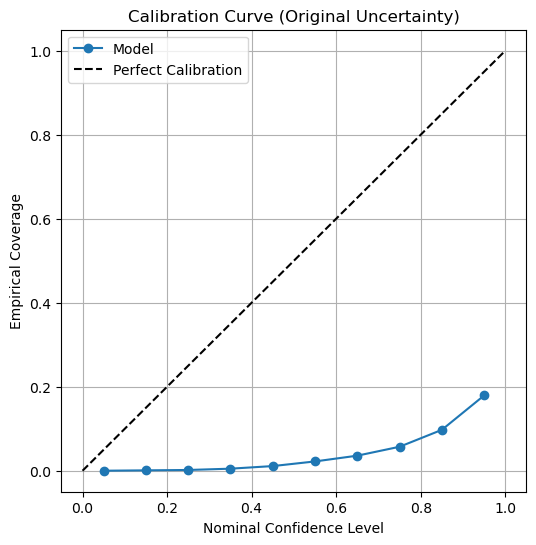

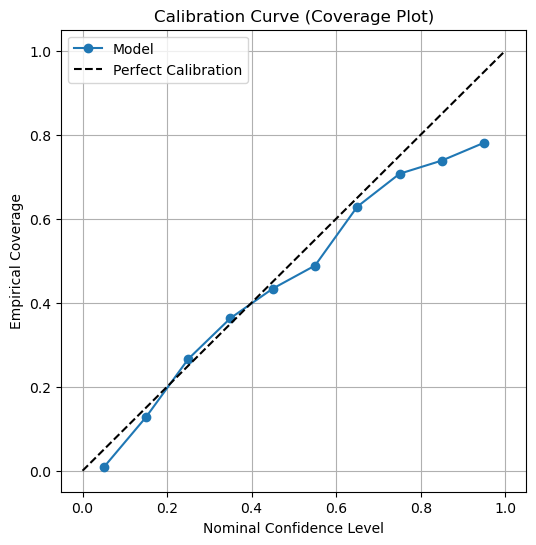

In [31]:
# Plot calibration curves
calibration_curve(
    y_test_denorm,
    mean_preds_denorm,
    std_preds_denorm,
    num_points = 10,
    title = "Calibration Curve (Original Uncertainty)"
)
calibration_curve(
    y_test_denorm,
    mean_preds_denorm,
    std_preds_calibrated_denorm,
    num_points = 10,
    title = "Calibration Curve (Coverage Plot)"
)

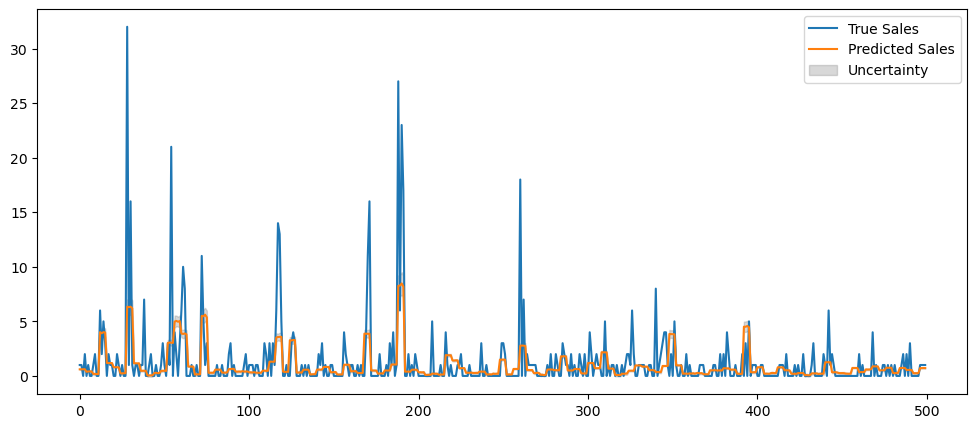

In [36]:
plt.figure(figsize=(12,5))
plt.plot(y_test_denorm[:500], label='True Sales')
plt.plot(mean_preds_denorm[:500], label='Predicted Sales')
plt.fill_between(range(500),
                 mean_preds_denorm[:500] - std_preds_denorm[:500],
                 mean_preds_denorm[:500] + std_preds_denorm[:500],
                 color='gray', alpha=0.3, label='Uncertainty')
plt.legend()
plt.show()